In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [9]:
df= pd.read_csv(r"C:\Users\Admin\Desktop\AI TYCS\diabetes.csv")

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.shape

(768, 9)

In [12]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [13]:
x=df.drop('Outcome', axis =1).values
y= df['Outcome'].values

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.4, random_state=42)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn= KNeighborsClassifier(n_neighbors=k)
    #fit the model
    knn.fit(x_train, y_train)
    #Computer accuracy on the training set
    train_accuracy[i]= knn.score(x_train, y_train)
    #computer accuracy on the test set
    test_accuracy[i]= knn.score (x_test, y_test)

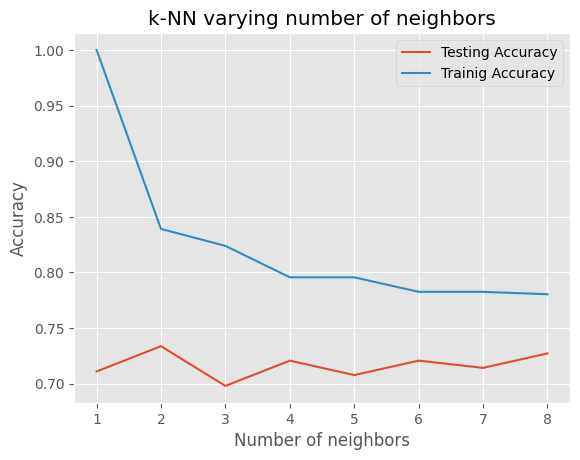

In [18]:
plt.title('k-NN varying number of neighbors')
plt.plot(neighbors, test_accuracy, label="Testing Accuracy")
plt.plot(neighbors, train_accuracy, label="Trainig Accuracy")
plt.legend()
plt.xlabel("Number of neighbors")
plt.ylabel('Accuracy')
plt.show()

In [19]:
knn= KNeighborsClassifier(n_neighbors=7)

In [20]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [21]:
knn.score(x_test, y_test)

0.7142857142857143

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
y_pred= knn.predict(x_test)

In [24]:
confusion_matrix(y_test, y_pred)

array([[163,  43],
       [ 45,  57]])

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       206
           1       0.57      0.56      0.56       102

    accuracy                           0.71       308
   macro avg       0.68      0.68      0.68       308
weighted avg       0.71      0.71      0.71       308



In [27]:
y_pred_proba= knn.predict_proba(x_test)[:,1]

In [28]:
from sklearn.metrics import roc_curve

In [29]:
fpr, tpr, thresholds= roc_curve(y_test, y_pred_proba)

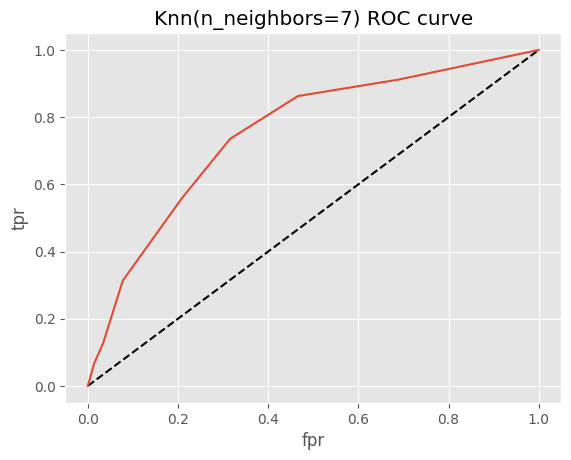

In [30]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [31]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba)

np.float64(0.7536645726251665)

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
param_grid= {'n_neighbors':np.arange(1,50)}

In [36]:
knn= KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid, cv=5)
knn_cv.fit(x,y)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [37]:
knn_cv.best_score_

np.float64(0.7578558696205755)

In [38]:
knn_cv.best_params_

{'n_neighbors': np.int64(14)}